In [11]:
import numpy as np
import pandas as pd
import scipy.optimize as fit
import matplotlib.pyplot as plt
import math

In [12]:
#read csv file
df = pd.read_csv('GlobalLandTemperaturesByState.csv')
#df2 = pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [13]:
#create table with only columns for date, temp, and state
df2 = df.drop(['AverageTemperatureUncertainty','Country'], axis = 1)
df2

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [14]:
#remove all rows with dates prior to 2000
df2.dtypes
df2['dt'] = pd.to_datetime(df2['dt'])

df3 = df2[df2['dt'].dt.year >= 2000]

df3

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [15]:
print(dir(df.iloc[0,0]))
df.iloc[0,0].title

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


<function str.title()>

In [16]:
df3 = df3[df3['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
df3

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [17]:
averages = df3.groupby('dt', as_index=False)['AverageTemperature'].mean()
df3 = df3.merge(averages, on = 'dt')
df3
#please ignore the error message here i promise it works :)

,dt,AverageTemperature_x,State,AverageTemperature_y
0,2000-01-01,-2.024,Nebraska,-4.072000
1,2000-02-01,1.719,Nebraska,-0.205000
2,2000-03-01,5.687,Nebraska,3.642667
3,2000-04-01,9.417,Nebraska,7.609667
4,2000-05-01,16.827,Nebraska,14.255000
...,...,...,...,...
490,2013-05-01,10.607,Wyoming,13.196000
491,2013-06-01,16.267,Wyoming,18.783667
492,2013-07-01,20.222,Wyoming,22.110333
493,2013-08-01,19.621,Wyoming,21.890000


In [18]:
df3 = df3.rename(columns = {'AverageTemperature_x' : 'AverageTemperature','AverageTemperature_y' : 'dtAve'})

In [19]:
df4 = df3.sort_values(by = 'dt')
df4

,dt,AverageTemperature,State,dtAve
0,2000-01-01,-2.024,Nebraska,-4.072
165,2000-01-01,-5.902,South Dakota,-4.072
330,2000-01-01,-4.290,Wyoming,-4.072
1,2000-02-01,1.719,Nebraska,-0.205
166,2000-02-01,-1.024,South Dakota,-0.205
...,...,...,...,...
163,2013-08-01,23.548,Nebraska,21.890
328,2013-08-01,22.501,South Dakota,21.890
329,2013-09-01,20.001,South Dakota,18.953
164,2013-09-01,21.047,Nebraska,18.953


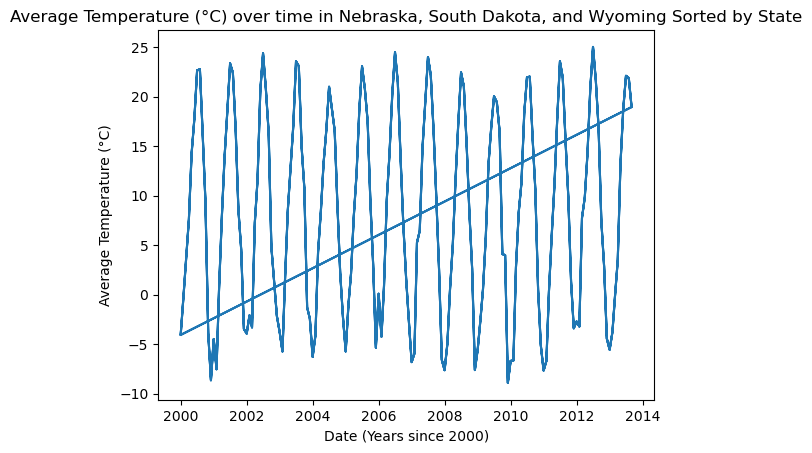

In [20]:
#Sorted by state (Worse)
plt.figure()
plt.plot(df3['dt'], df3['dtAve'])
plt.xlabel('Date (Years since 2000)')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature (°C) over time in Nebraska, South Dakota, and Wyoming Sorted by State')
plt.show()

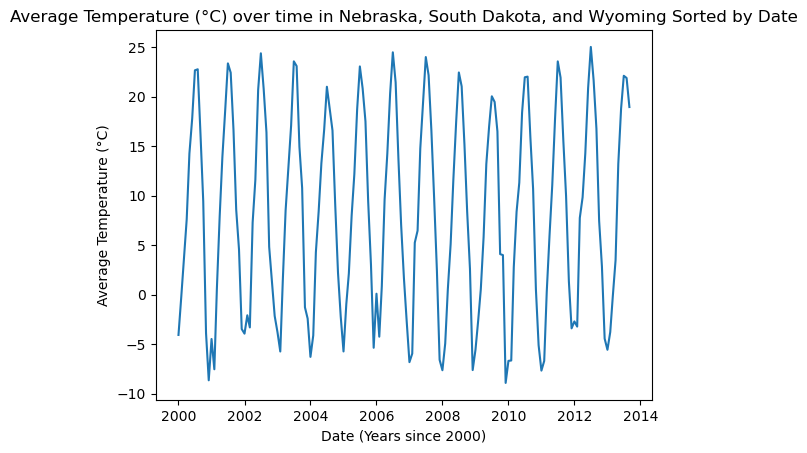

In [21]:
#Sorted by date (better)
plt.figure()
plt.plot(df4['dt'], df4['dtAve'])
plt.xlabel('Date (Years since 2000)')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature (°C) over time in Nebraska, South Dakota, and Wyoming Sorted by Date')
plt.show()

In [22]:
# year + month (as a fraction) + day(as a fraction)
df4['intDate'] = df4['dt'].dt.strftime('%Y').astype(int) + (df4['dt'].dt.strftime('%m').astype(int))/12 + (df4['dt'].dt.strftime('%d').astype(int))/365

In [23]:
df4

,dt,AverageTemperature,State,dtAve,intDate
0,2000-01-01,-2.024,Nebraska,-4.072,2000.086073
165,2000-01-01,-5.902,South Dakota,-4.072,2000.086073
330,2000-01-01,-4.290,Wyoming,-4.072,2000.086073
1,2000-02-01,1.719,Nebraska,-0.205,2000.169406
166,2000-02-01,-1.024,South Dakota,-0.205,2000.169406
...,...,...,...,...,...
163,2013-08-01,23.548,Nebraska,21.890,2013.669406
328,2013-08-01,22.501,South Dakota,21.890,2013.669406
329,2013-09-01,20.001,South Dakota,18.953,2013.752740
164,2013-09-01,21.047,Nebraska,18.953,2013.752740


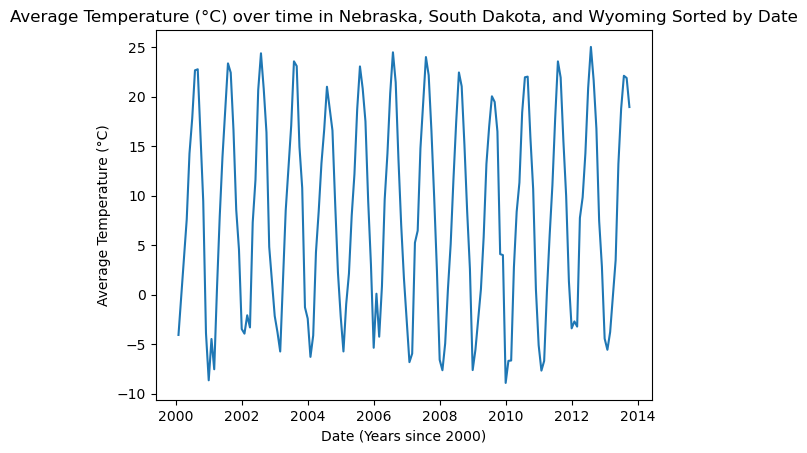

In [24]:
plt.figure()
plt.plot(df4['intDate'], df4['dtAve'])
plt.xlabel('Date (Years since 2000)')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature (°C) over time in Nebraska, South Dakota, and Wyoming Sorted by Date')
plt.show()

In [80]:
def f(x,a,b,c,d):
    return a * np.cos(x* ((2*np.pi)/b) + c) + d
p0 = np.array([15,1,np.pi,10])

In [82]:
par, cov = fit.curve_fit(f, df4['intDate'],df4['dtAve'], p0)

In [84]:
par

array([13.89959684,  1.00060705, 10.19180425,  8.12295064])

In [86]:
cov

array([[ 1.68016035e-02,  2.40434878e-06,  3.02938987e-02,
        -1.40817653e-04],
       [ 2.40434878e-06,  1.43993090e-07,  1.81353642e-03,
        -6.38495655e-07],
       [ 3.02938987e-02,  1.81353642e-03,  2.28408670e+01,
        -8.06029257e-03],
       [-1.40817653e-04, -6.38495655e-07, -8.06029257e-03,
         8.44746393e-03]])

In [88]:
print(df4.dtypes)

dt                    datetime64[ns]
AverageTemperature           float64
State                         object
dtAve                        float64
intDate                      float64
dtype: object


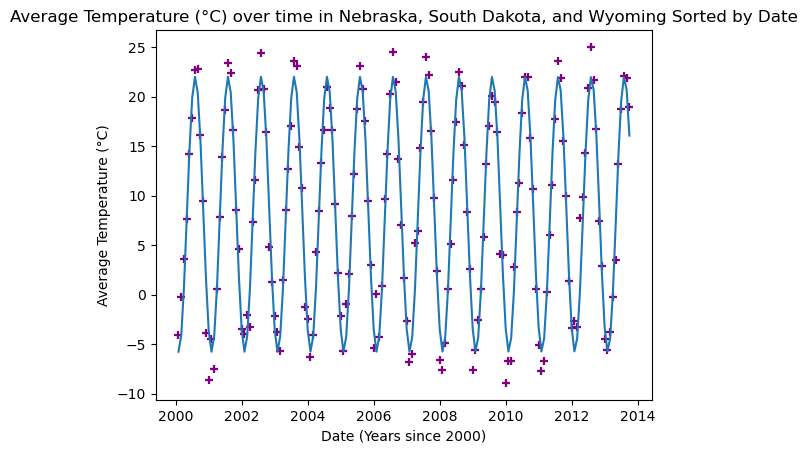

In [92]:
#YAYYYYY FINALLY GRAPH WITH FIT LINE
arr1 = np.array(df4['intDate'])
plt.figure()
plt.scatter(df4['intDate'], df4['dtAve'], color = 'purple',marker = '+')
plt.plot(df4['intDate'],f(arr1, par[0], par[1], par[2], par[3]))
plt.xlabel('Date (Years since 2000)')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature (°C) over time in Nebraska, South Dakota, and Wyoming Sorted by Date')
plt.show()

In [112]:
#Note, a = amplitude, b = period, c = phase angle, d = shift along y-axis. 
#Also note that error in c is inaccurate because the phase angle can be any multiple of pi for it to be correct (it isn't so i don't know
#how the fit is still correct but oh well)
error_list = [['a','b','c','d'],[cov[0][0],cov[1][1],cov[2][2],cov[3][3]]]
error_list

[['a', 'b', 'c', 'd'],
 [0.01680160348501529,
  1.4399308978964256e-07,
  22.840867011967955,
  0.00844746392516529]]

In [114]:
print('Amplitude:',par[0], '±' , cov[0][0])
print('Period:', par[1], '±' , cov[1][1])
print('Phase Angle:', par[2], '±' , cov[2][2])
print('Shift along Y-Axis:', par[3], '±' , cov[3][3])
print('Final Equation: ', par[0], 'cos(', (2*np.pi)/par[1],'x +', par[2],') +', par[3])

Amplitude: 13.899596844718227 ± 0.01680160348501529
Period: 1.0006070508204403 ± 1.4399308978964256e-07
Phase Angle: 10.191804247046203 ± 22.840867011967955
Shift along Y-Axis: 8.122950642254974 ± 0.00844746392516529
Final Equation:  13.899596844718227 cos( 6.279373408400166 x + 10.191804247046203 ) + 8.122950642254974
